In [44]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from topostats.io import LoadScans
from topostats.plotting import Colormap

colormap = Colormap()
cmap = colormap.get_cmap()

vmin = -3
vmax = 4

In [42]:
base_dir = Path("/Users/sylvi/topo_data/topostats_2/datasets/picoz-nicked-sc")
assert base_dir.exists()
output_dir = base_dir / "output_abs_07"
assert output_dir.exists()
figure_dir = Path("/Users/sylvi/topo_data/topostats_2/figures/fig-dataset-separation/")
assert figure_dir.exists()

df_allstats = pd.read_csv(output_dir / "all_statistics.csv")


def calculate_num_char_in_string(input_string: str, character: str) -> int:
    """Calculate the number of occurrences of a specific character in a string."""
    # check if nan
    if pd.isna(input_string):
        return 0
    return input_string.count(character)


def remove_datapoints_outside_n_std(df: pd.DataFrame, column: str, n_std: float) -> pd.DataFrame:
    """Remove datapoints outside n standard deviations from the mean."""
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - n_std * std
    upper_bound = mean + n_std * std
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


df_allstats["num_plusses"] = df_allstats["writhe_string"].apply(calculate_num_char_in_string, character="+")
df_allstats["num_minuses"] = df_allstats["writhe_string"].apply(calculate_num_char_in_string, character="-")
df_allstats["num_plusses_or_minuses"] = df_allstats["num_plusses"] + df_allstats["num_minuses"]

print(df_allstats.columns)

Index(['image', 'threshold', 'grain_number', 'class_number', 'subgrain_number',
       'centre_x', 'centre_y', 'radius_min', 'radius_max', 'radius_mean',
       'radius_median', 'height_min', 'height_max', 'height_median',
       'height_mean', 'volume', 'area', 'area_cartesian_bbox',
       'smallest_bounding_width', 'smallest_bounding_length',
       'smallest_bounding_area', 'aspect_ratio', 'max_feret', 'min_feret',
       'basename', 'class_name', 'grain_endpoints', 'grain_junctions',
       'total_branch_lengths', 'grain_width_mean', 'num_mols', 'writhe_string',
       'total_contour_length', 'average_end_to_end_distance', 'num_plusses',
       'num_minuses', 'num_plusses_or_minuses'],
      dtype='object')


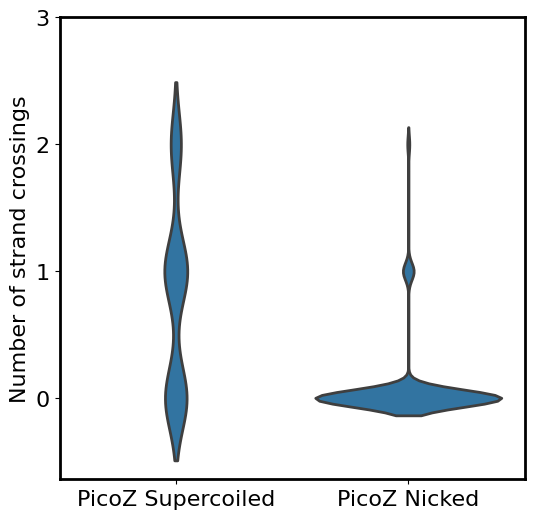

In [58]:
# sns.stripplot(data=remove_datapoints_outside_n_std(df_allstats, "num_plusses_or_minuses", 3), x="basename", y="num_plusses_or_minuses", jitter=True)
# with increased smoothing
fig, ax = plt.subplots(figsize=(6, 6))
# violin without the boxplot inside
sns.violinplot(
    data=remove_datapoints_outside_n_std(df_allstats, "num_plusses_or_minuses", 3),
    x="basename",
    y="num_plusses_or_minuses",
    ax=ax,
    bw_adjust=0.7,
    inner=None,
    linewidth=2,
)
ax.set_xticks(ticks=[0, 1])
ax.set_xticklabels(labels=["PicoZ Supercoiled", "PicoZ Nicked"])
ax.set_ylabel("Number of strand crossings", fontsize=16)
ax.set_xlabel("")
# line thickness for axes thicker
axes_linewidth = 2
ax.spines["top"].set_linewidth(axes_linewidth)
ax.spines["right"].set_linewidth(axes_linewidth)
ax.spines["left"].set_linewidth(axes_linewidth)
ax.spines["bottom"].set_linewidth(axes_linewidth)
# make y ticks be integers only
ax.set_yticks(ticks=np.arange(0, 4))
# text size
ax.tick_params(axis="both", which="major", labelsize=16)
plt.savefig(figure_dir / f"fig-dataset-separation-violin", bbox_inches="tight")


# sns.histplot(data=remove_datapoints_outside_n_std(df_allstats, "num_plusses_or_minuses", 3), x="basename", hue="num_plusses_or_minuses", multiple="dodge", shrink=0.8)
# # rename the xlabels to be more descriptive
# plt.xticks(ticks=[0, 1], labels=["PicoZ Supercoiled", "PicoZ Nicked"])
# plt.ylabel("Number of crossings")
# plt.xlabel("")
# plt.show()

# sns.violinplot(data=remove_datapoints_outside_n_std(df_allstats, "smallest_bounding_area", 3), x="basename", y="smallest_bounding_area")
# plt.show()

[Wed, 01 Oct 2025 20:02:07] [INFO    ] [topostats] Extracting image from /Users/sylvi/topo_data/topostats_2/datasets/picoz-nicked-sc/output_abs_07/nicked/processed/20250926_nicked_picoz.0_00008.topostats


20:02:07 | INFO |topostats.py:topostats:load_topostats:38 | Loading image from : /Users/sylvi/topo_data/topostats_2/datasets/picoz-nicked-sc/output_abs_07/nicked/processed/20250926_nicked_picoz.0_00008.topostats
20:02:07 | INFO |topostats.py:topostats:load_topostats:47 | [20250926_nicked_picoz.0_00008] TopoStats file version : 2.3.2
20:02:07 | INFO |topostats.py:topostats:load_topostats:54 | [20250926_nicked_picoz.0_00008] : Extracted .topostats dictionary.


[Wed, 01 Oct 2025 20:02:07] [INFO    ] [topostats] Extracting image from /Users/sylvi/topo_data/topostats_2/datasets/picoz-nicked-sc/output_abs_07/supercoiled/processed/20250926_supercoiled_picoz.0_00003.topostats


20:02:07 | INFO |topostats.py:topostats:load_topostats:38 | Loading image from : /Users/sylvi/topo_data/topostats_2/datasets/picoz-nicked-sc/output_abs_07/supercoiled/processed/20250926_supercoiled_picoz.0_00003.topostats
20:02:07 | INFO |topostats.py:topostats:load_topostats:47 | [20250926_supercoiled_picoz.0_00003] TopoStats file version : 2.3.2
20:02:07 | INFO |topostats.py:topostats:load_topostats:54 | [20250926_supercoiled_picoz.0_00003] : Extracted .topostats dictionary.


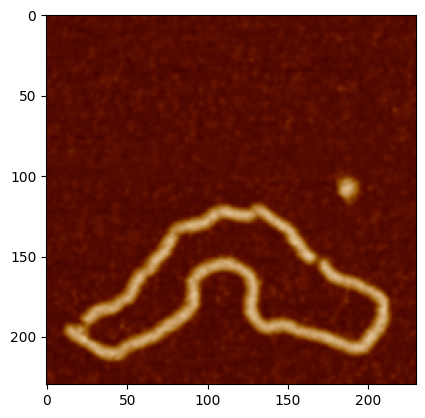

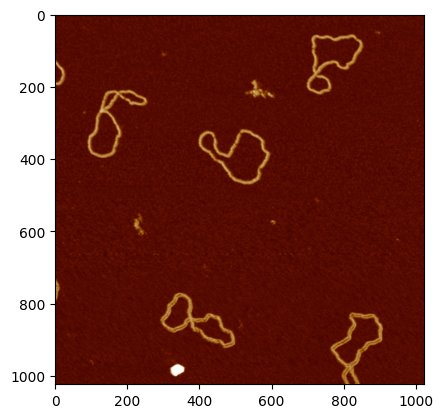

In [ ]:
nicked_molecule_example_file = Path(
    "/Users/sylvi/topo_data/topostats_2/datasets/picoz-nicked-sc/output_abs_07/nicked/processed/20250926_nicked_picoz.0_00008.topostats"
)
assert nicked_molecule_example_file.exists()
supercoiled_molecule_example_file = Path(
    "/Users/sylvi/topo_data/topostats_2/datasets/picoz-nicked-sc/output_abs_07/supercoiled/processed/20250926_supercoiled_picoz.0_00003.topostats"
)
assert supercoiled_molecule_example_file.exists()

loadscans = LoadScans([nicked_molecule_example_file, supercoiled_molecule_example_file], channel="dummy")
loadscans.get_data()
loadscans_image_dictionary = loadscans.img_dict

nicked_example_image_data = loadscans_image_dictionary[nicked_molecule_example_file.stem]
supercoiled_example_image_data = loadscans_image_dictionary[supercoiled_molecule_example_file.stem]

nicked_crop_x = 200
nicked_crop_y = 650
nicked_crop_size = (230, 230)
nicked_example_image = nicked_example_image_data["image"]
nicked_example_image_crop = nicked_example_image[
    nicked_crop_y : nicked_crop_y + nicked_crop_size[0], nicked_crop_x : nicked_crop_x + nicked_crop_size[1]
]

plt.imshow(nicked_example_image_crop, cmap=cmap, vmin=vmin, vmax=vmax)
plt.show()

plt.imshow(supercoiled_example_image_data["image"], cmap=cmap, vmin=vmin, vmax=vmax)
plt.show()

# actually can just crop from output images directly.

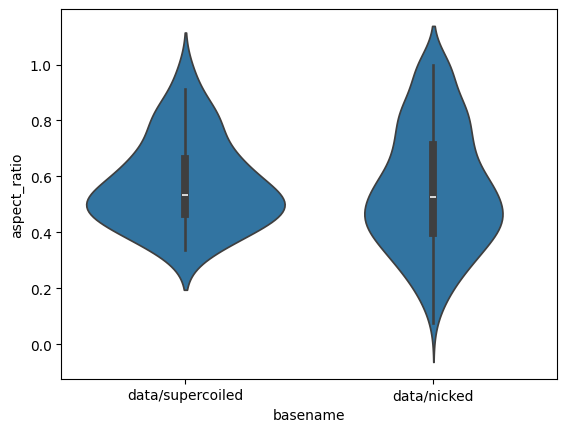

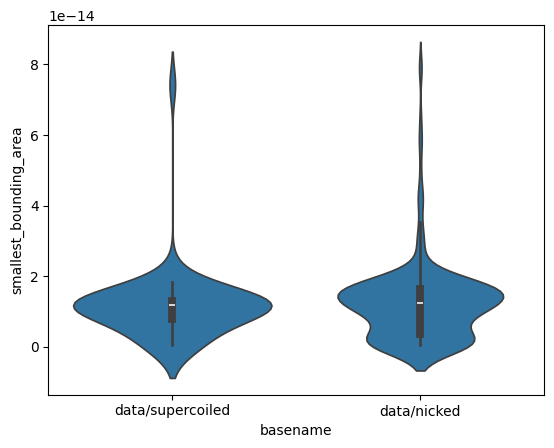

In [61]:
sns.violinplot(data=df_allstats, x="basename", y="aspect_ratio")
plt.show()

sns.violinplot(data=df_allstats, x="basename", y="smallest_bounding_area")
plt.show()